# Hurricane Path Prediction

## Load Data

In [2]:
%pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopy.distance import great_circle as vc
import math as Math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.models import model_from_json
import time


In [2]:
data = pd.read_csv('/Users/kartikjain/Documents/viiSemester/DMS672/Hurricane Path Prediction Solution/Phase 2/Data/hurricane_data_1920_2020.csv', index_col=None, names=['Year', 'Month', 'Day', 'Hour', 'HurricaneNum', 'Name', 'Lat', 'Long', 'WindSpeed', 'Pressure'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43601 entries, 0 to 43600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          43601 non-null  int64  
 1   Month         43601 non-null  int64  
 2   Day           43601 non-null  int64  
 3   Hour          43601 non-null  int64  
 4   HurricaneNum  43601 non-null  object 
 5   Name          43601 non-null  object 
 6   Lat           43601 non-null  object 
 7   Long          43601 non-null  float64
 8   WindSpeed     43601 non-null  float64
 9   Pressure      43601 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.3+ MB


In [3]:

data['unique-key'] = data['Name'] + '-' + data['Year'].map(str) + '-' + data['HurricaneNum']
data.drop(['Name', 'Year', 'HurricaneNum'], axis = 1, inplace = True)
data.head()

,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,unique-key
0,5,16,18,28,-78.7,30.0,1008,ARTHUR-2020-AL012020
1,5,17,0,28.9,-78.0,35.0,1006,ARTHUR-2020-AL012020
2,5,17,6,29.6,-77.6,35.0,1004,ARTHUR-2020-AL012020
3,5,17,12,30.3,-77.5,35.0,1003,ARTHUR-2020-AL012020
4,5,17,18,31,-77.3,40.0,1003,ARTHUR-2020-AL012020


# Cleaning

In [4]:
data = data[data['Pressure'] != 0]
data = data[~data['Lat'].str.contains("NAMED")]

keys = list(enumerate(pd.unique(data['unique-key'])))

In [5]:
total_hurricane_count = len(pd.unique(data['unique-key']))
y = np.zeros((total_hurricane_count))
for x in range(0,total_hurricane_count):
    y[x] = len(pd.DataFrame(data[data['unique-key'] == keys[x][1]], columns = data.keys()).reset_index(drop = True))

hurricane_amount = pd.DataFrame(y)

In [6]:
hurricane_amount.head()

,0
0,18.0
1,6.0
2,43.0
3,12.0
4,22.0


In [7]:
print ('Top 6 Hurricanes (in terms of data quantity)')
for x in hurricane_amount.nlargest(6, 0).index:
    print (keys[x][1], "-", hurricane_amount.loc[x][0])

hurricane_amount.describe()

Top 6 Hurricanes (in terms of data quantity)
NADINE-2012-AL142012 - 96.0
NADINE-2012-14 - 96.0
IVAN-2004-9 - 94.0
KYLE-2002-12 - 90.0
LESLIE-2018-AL132018 - 89.0
KYLE-2002-AL122002 - 88.0


,0
count,1141.000000
mean,23.441718
std,19.043288
min,1.000000
25%,8.000000
50%,19.000000
75%,33.000000
max,96.000000


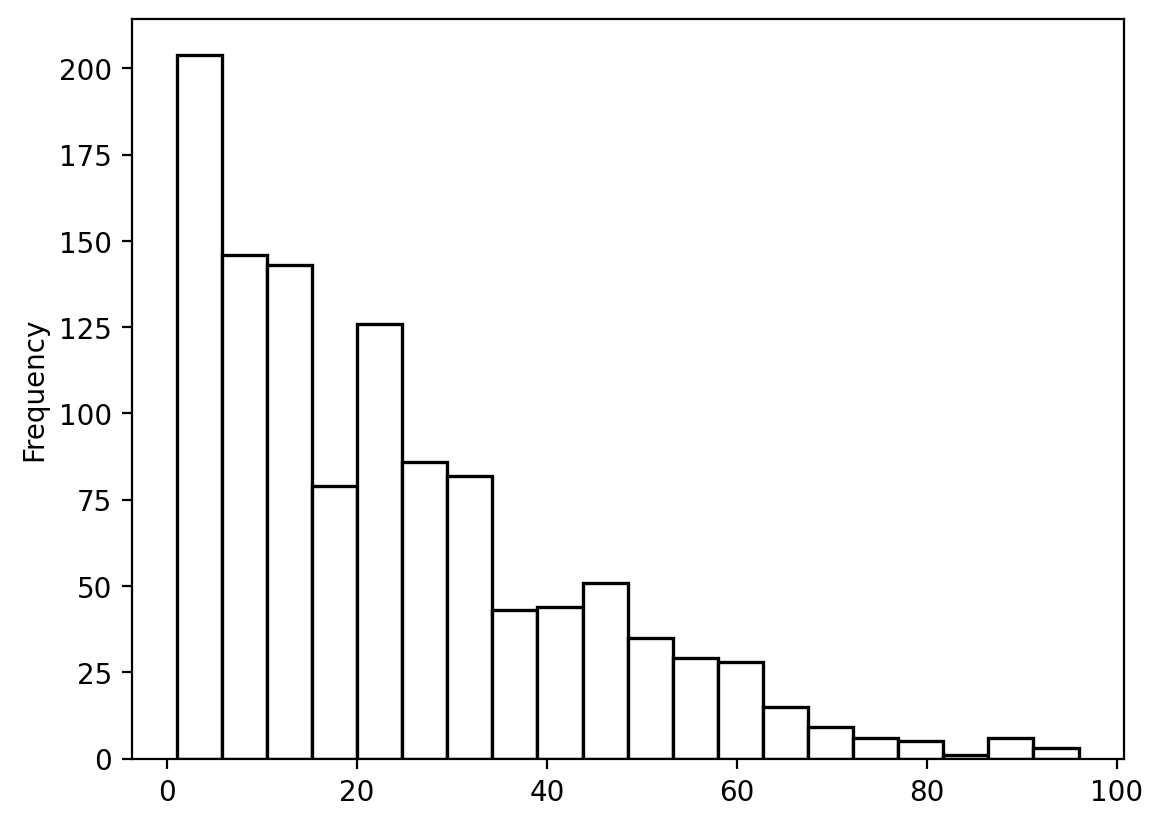

Axes(0.125,0.11;0.775x0.77)


In [8]:
# Print the distribution of data quantity for all hurricanes
dist = hurricane_amount.plot.hist(bins=20, edgecolor='black', histtype='barstacked', color='white', legend=None, linewidth=1.2)
plt.show()
print(dist)

# Filtering

In [9]:
cond = (hurricane_amount > 6) & (hurricane_amount < 60)

In [10]:
filtered_keys = []
for x in cond.index:
    if cond.loc[x][0]:
        filtered_keys.append(keys[x][1])
print((filtered_keys))

['ARTHUR-2020-AL012020', 'CRISTOBAL-2020-AL032020', 'DOLLY-2020-AL042020', 'EDOUARD-2020-AL052020', 'FAY-2020-AL062020', 'GONZALO-2020-AL072020', 'HANNA-2020-AL082020', 'ISAIAS-2020-AL092020', 'TEN-2020-AL102020', 'JOSEPHINE-2020-AL112020', 'KYLE-2020-AL122020', 'LAURA-2020-AL132020', 'MARCO-2020-AL142020', 'OMAR-2020-AL152020', 'NANA-2020-AL162020', 'RENE-2020-AL182020', 'SALLY-2020-AL192020', 'TEDDY-2020-AL202020', 'VICKY-2020-AL212020', 'BETA-2020-AL222020', 'WILFRED-2020-AL232020', 'ALPHA-2020-AL242020', 'GAMMA-2020-AL252020', 'DELTA-2020-AL262020', 'EPSILON-2020-AL272020', 'ZETA-2020-AL282020', 'ETA-2020-AL292020', 'THETA-2020-AL302020', 'IOTA-2020-AL312020', 'ANDREA-2019-AL012019', 'BARRY-2019-AL022019', 'CHANTAL-2019-AL042019', 'ERIN-2019-AL062019', 'FERNAND-2019-AL072019', 'GABRIELLE-2019-AL082019', 'HUMBERTO-2019-AL092019', 'JERRY-2019-AL102019', 'IMELDA-2019-AL112019', 'KAREN-2019-AL122019', 'LORENZO-2019-AL132019', 'MELISSA-2019-AL142019', 'FIFTEEN-2019-AL152019', 'NESTOR-20

In [11]:
data = data[data['unique-key'].isin(filtered_keys)]
keys = list(enumerate(pd.unique(data['unique-key'])))

In [12]:
total_hurricane_count = len(pd.unique(data['unique-key']))
y = np.zeros((total_hurricane_count))
for x in range(0,total_hurricane_count):
    y[x] = len(pd.DataFrame(data[data['unique-key'] == keys[x][1]], columns = data.keys()).reset_index(drop = True))

hurricane_amount = pd.DataFrame(y)

In [13]:
# Print the hurricane key with the amount of data they contain
print ('Top 6 Hurricanes (in terms of data quantity)')
for x in hurricane_amount.nlargest(6, 0).index:
    print (keys[x][1], "-", hurricane_amount.loc[x][0])

Top 6 Hurricanes (in terms of data quantity)
IRMA-2017-AL112017 - 59.0
LESLIE-2012-AL122012 - 59.0
DENNIS-2005-4 - 59.0
OPHELIA-2011-16 - 59.0
OPHELIA-2011-AL162011 - 58.0
IKE-2008-AL092008 - 58.0


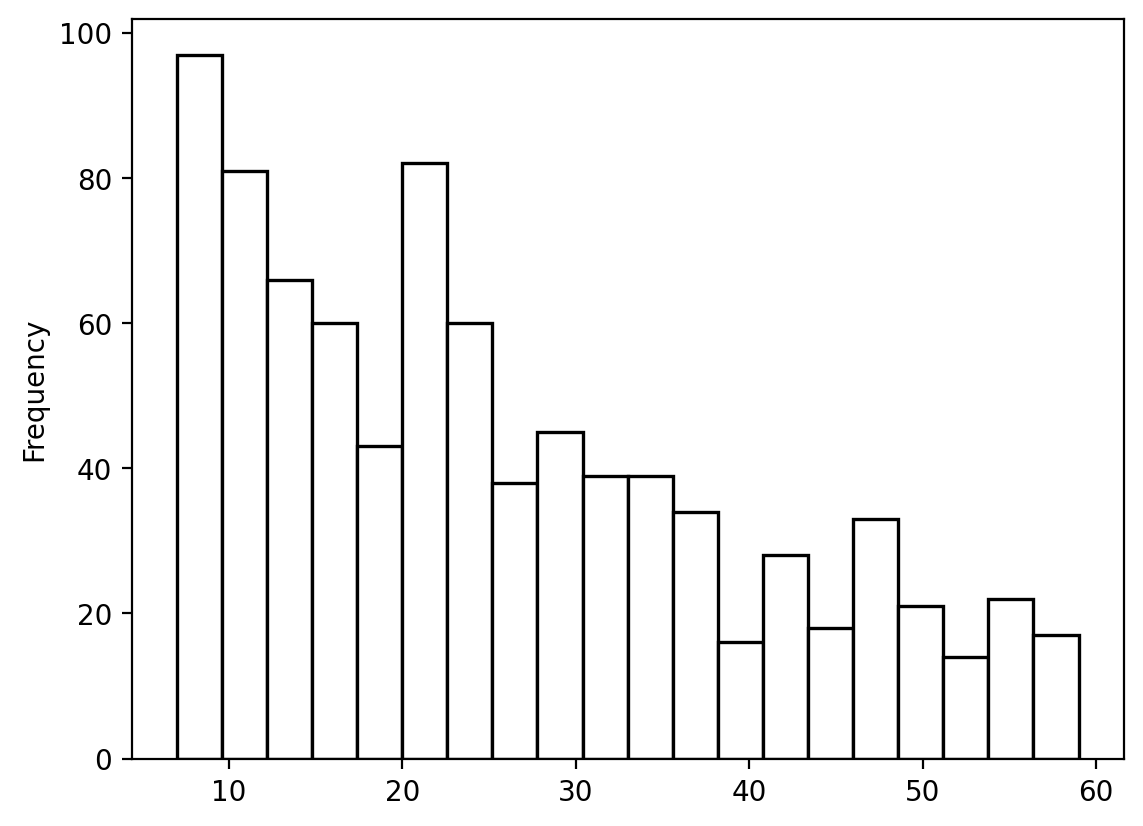

In [14]:
# Print the distribution of data quantity for all hurricanes
dist = hurricane_amount.plot.hist(bins=20, edgecolor='black', histtype='barstacked', color='white', legend=None, linewidth=1.2)
plt.show()

In [15]:
total_data_count = len(data)
print(total_data_count)

21680


In [16]:
data.to_csv('checkpoint-dataframem.csv')

# Data Preprocessing & EDA

In [17]:
data = pd.read_csv('checkpoint-dataframem.csv', index_col=0, header=0)

In [18]:
y = np.zeros(total_hurricane_count)
data['distance'] = np.zeros(total_data_count)
data['direction'] = np.zeros(total_data_count)

for x in range(0, total_hurricane_count):
    t = pd.DataFrame(data[data['unique-key'] == keys[x][1]], columns = data.keys()).reset_index(drop = False)
    dst = 0
    prev = (0,0)

    for p in zip(t['Lat'], t['Long']):

        if prev == (0,0):
            prev = p
            continue

        index_to_update = t[(t['Lat'] == p[0]) & (t['Long'] == p[1])]['index'].values[0]
        data.at[index_to_update, 'distance'] = vc(prev,p).miles

        dLon = p[1] - prev[1]
        temp = float(p[0])
        y_x = Math.sin(dLon) * Math.cos(temp)
        x_x = Math.cos(p[1]) * Math.sin(temp) - Math.sin(p[1]) * Math.cos(temp) * Math.cos(dLon)
        brng = Math.degrees(Math.atan2(y_x, x_x))
        if (brng < 0):
            brng+= 360

        index_to_update = t[(t['Lat'] == p[0]) & (t['Long'] == p[1])]['index'].values[0]
        data.at[index_to_update, 'direction'] = brng
        dst += vc(prev,p).miles
        prev = p
    y[x] = dst

hurricane_distance = pd.DataFrame(y)

In [19]:
# Columns have been added
data.head()

,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,unique-key,distance,direction
0,5,16,18,28.0,-78.7,30.0,1008,ARTHUR-2020-AL012020,0.000000,0.000000
1,5,17,0,28.9,-78.0,35.0,1006,ARTHUR-2020-AL012020,75.333355,289.382873
2,5,17,6,29.6,-77.6,35.0,1004,ARTHUR-2020-AL012020,54.043107,346.439371
3,5,17,12,30.3,-77.5,35.0,1003,ARTHUR-2020-AL012020,48.734494,3.018270
4,5,17,18,31.0,-77.3,40.0,1003,ARTHUR-2020-AL012020,49.804986,10.514512


In [20]:
hurricane_distance.describe()

,0
count,853.000000
mean,2178.532983
std,1391.951849
min,86.434363
25%,1070.844013
50%,1859.401520
75%,2971.291845
max,6572.689997


In [21]:
print ('Top 6 Hurricanes (in terms of distance traveled)')
for x in hurricane_distance.nlargest(6, 0).index:
    print (keys[x][1], "-", hurricane_distance.loc[x][0], "miles -", hurricane_amount.loc[x][0])

Top 6 Hurricanes (in terms of distance traveled)
BERTHA-2014-AL032014 - 6572.689996921373 miles - 46.0
KATE-2003-AL162003 - 6392.865052499503 miles - 58.0
KATE-2003-16 - 6392.865052499503 miles - 58.0
BERTHA-1996-2 - 6391.7852319952735 miles - 51.0
RAFAEL-2012-AL172012 - 6351.748249370005 miles - 56.0
RAFAEL-2012-17 - 6351.748249370005 miles - 56.0


[[1.        0.7783713]
 [0.7783713 1.       ]]


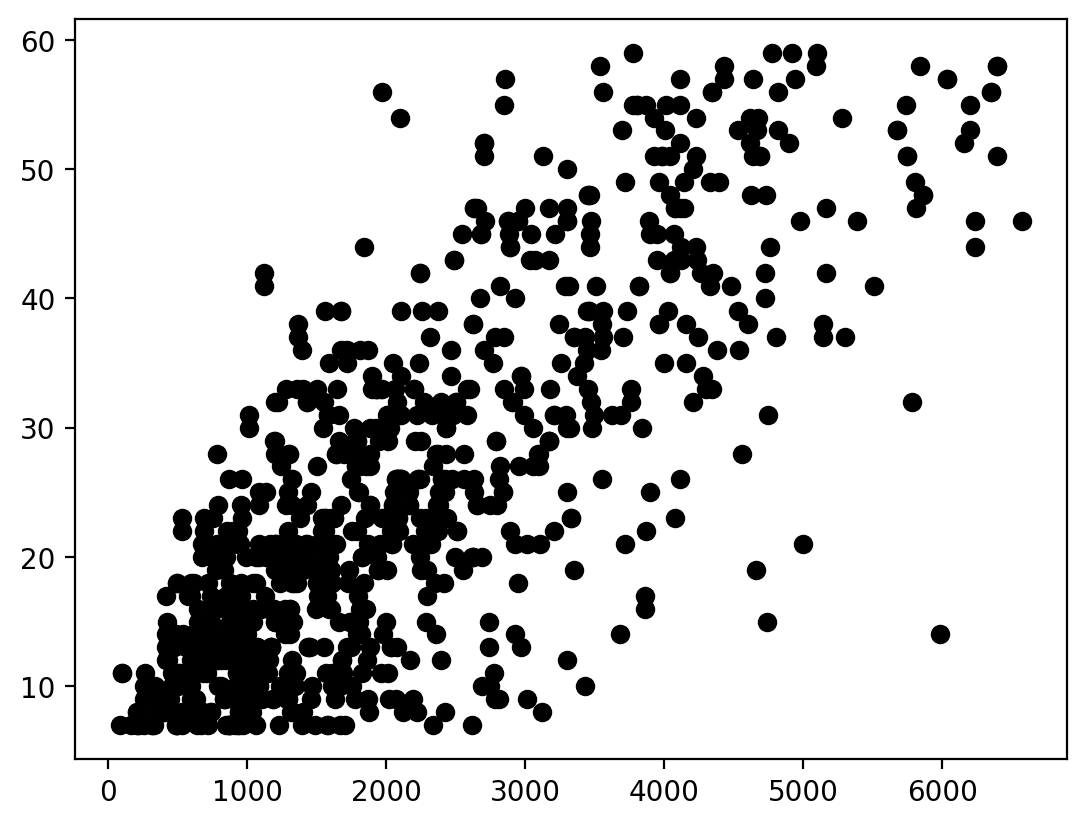

In [22]:
print( np.corrcoef(hurricane_distance[0], hurricane_amount[0]) )
corr = plt.scatter(hurricane_distance[0], hurricane_amount[0], color='black')
plt.show()

In [23]:
%pip install pyproj
%pip install basemap

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


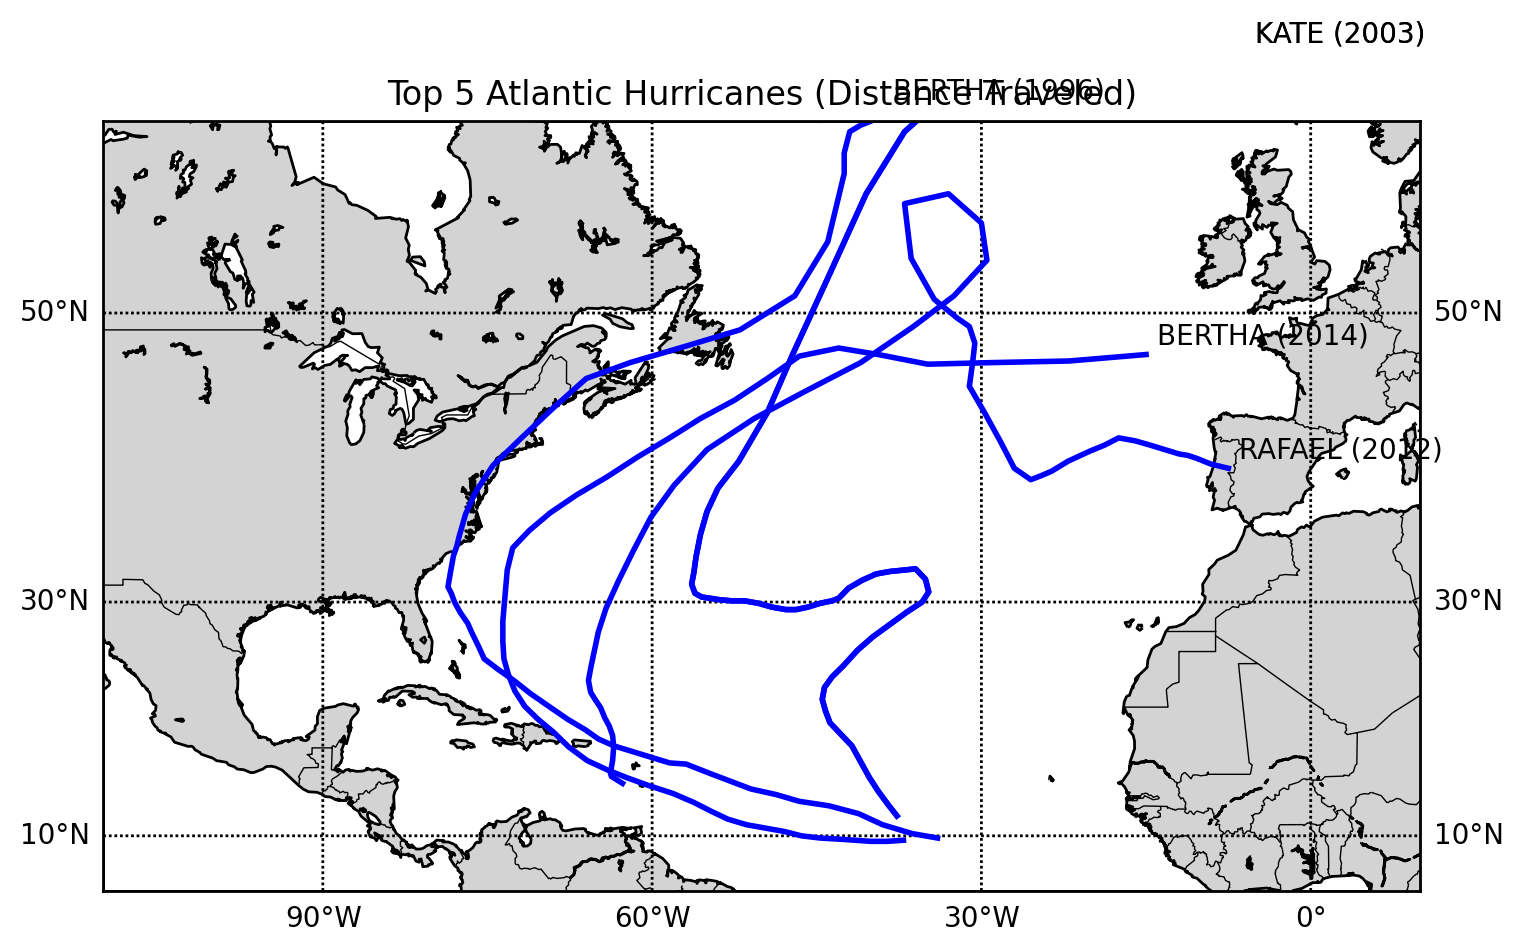

In [24]:
# Import Basemap
from mpl_toolkits.basemap import Basemap

n = 5 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(10,5))
m = Basemap(llcrnrlon=-110.,llcrnrlat=5.,urcrnrlon=10.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='#D3D3D3')
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

for x in hurricane_distance.nlargest(n,0).index:
    largest_hurr = data[data['unique-key'] == keys[x][1]]
    lat = largest_hurr['Lat'].values
    long = largest_hurr['Long'].values
    xpt, ypt = m(long, lat)
    plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, '%s (%s)' % (keys[x][1].split('-')[0],keys[x][1].split('-')[1]))
    m.plot(xpt, ypt, linewidth=2, color='blue')

plt.title('Top 5 Atlantic Hurricanes (Distance Traveled)')
plt.show()

largest 5

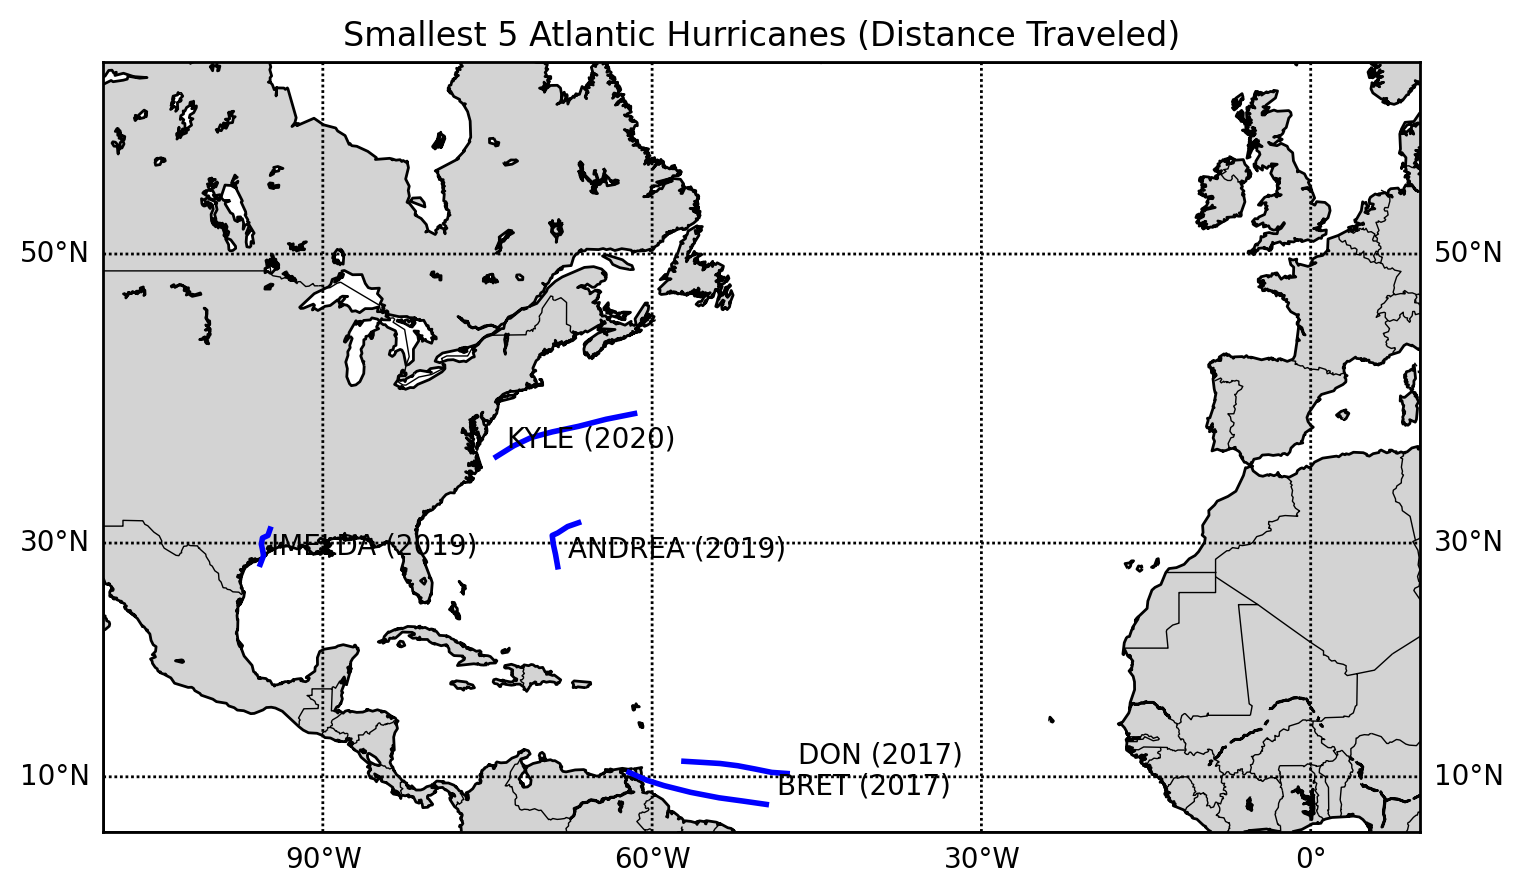

In [25]:
# Graph the trajectories of the shortest hurricanes (the ones that traveled the least)
plt.figure(figsize=(10,5))
m = Basemap(llcrnrlon=-110.,llcrnrlat=5.,urcrnrlon=10.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='#D3D3D3')
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

for x in hurricane_amount.nsmallest(n,0).index:
    smallest_hurr = data[data['unique-key'] == keys[x][1]]
    lat = smallest_hurr['Lat'].values
    long = smallest_hurr['Long'].values
    xpt, ypt = m(long, lat)
    plt.text(xpt[0]+100000,ypt[0]+100000, '%s (%s)' % (keys[x][1].split('-')[0],keys[x][1].split('-')[1]))
    m.plot(xpt, ypt, linewidth=2, color='blue')

plt.title('Smallest 5 Atlantic Hurricanes (Distance Traveled)')
plt.show()

smallest

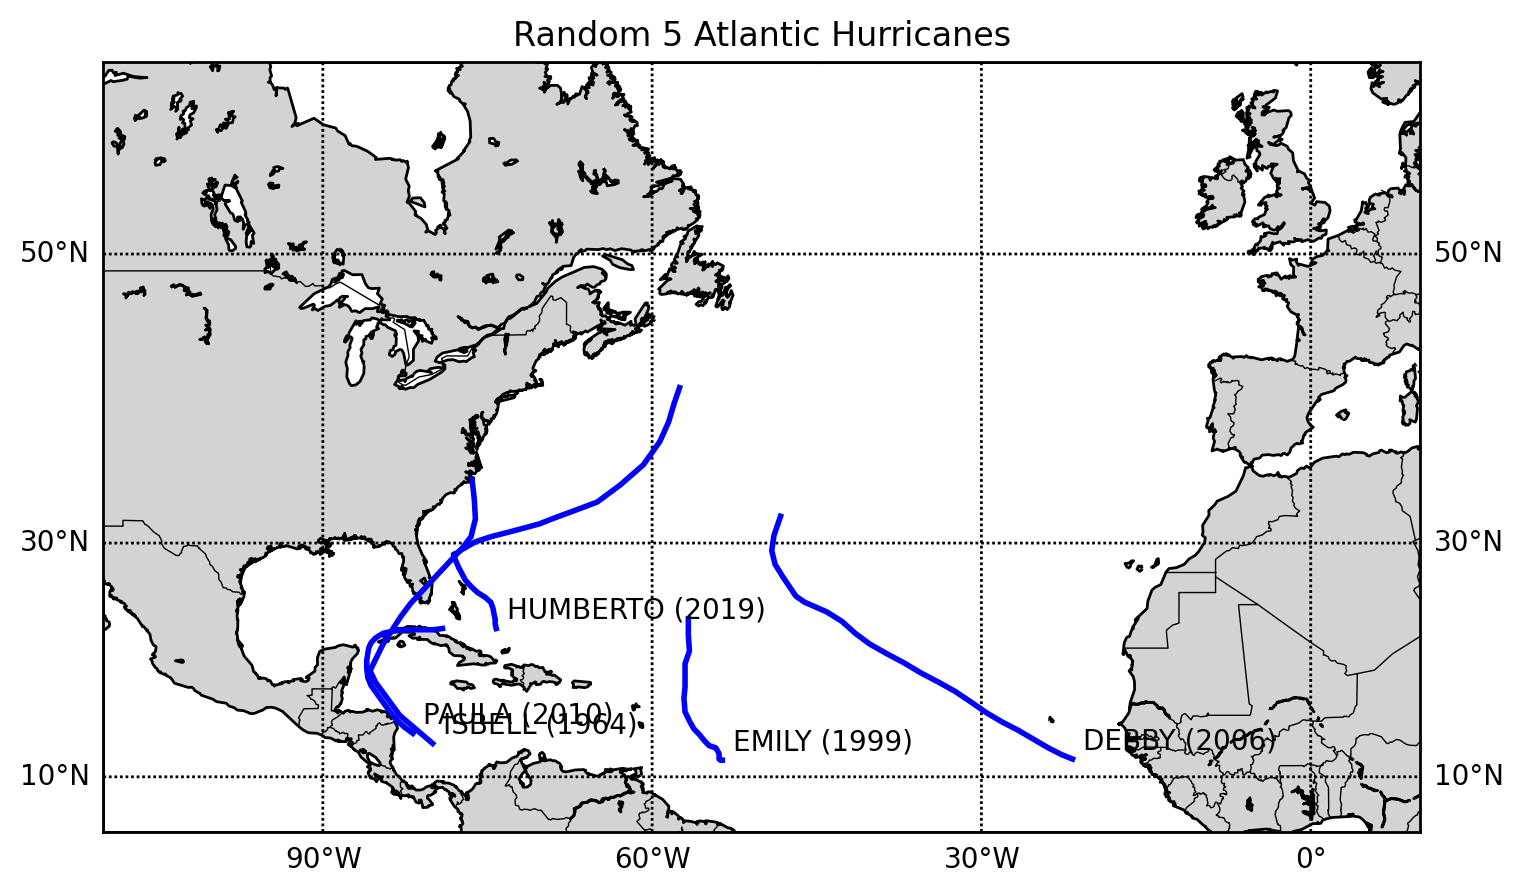

In [26]:
# Graph the trajectories of 3 random hurricanes
plt.figure(figsize=(10,5))
m = Basemap(llcrnrlon=-110.,llcrnrlat=5.,urcrnrlon=10.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='#D3D3D3')
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

for x in np.random.choice(total_hurricane_count, n):
    random_hurr = data[data['unique-key'] == keys[x][1]]
    lat = random_hurr['Lat'].values
    long = random_hurr['Long'].values
    xpt, ypt = m(long, lat)
    plt.text(xpt[0]+100000,ypt[0]+100000, '%s (%s)' % (keys[x][1].split('-')[0],keys[x][1].split('-')[1]))
    m.plot(xpt, ypt, linewidth=2, color='blue')

plt.title('Random 5 Atlantic Hurricanes')
plt.show()

In [27]:
data.head()

,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,unique-key,distance,direction
0,5,16,18,28.0,-78.7,30.0,1008,ARTHUR-2020-AL012020,0.000000,0.000000
1,5,17,0,28.9,-78.0,35.0,1006,ARTHUR-2020-AL012020,75.333355,289.382873
2,5,17,6,29.6,-77.6,35.0,1004,ARTHUR-2020-AL012020,54.043107,346.439371
3,5,17,12,30.3,-77.5,35.0,1003,ARTHUR-2020-AL012020,48.734494,3.018270
4,5,17,18,31.0,-77.3,40.0,1003,ARTHUR-2020-AL012020,49.804986,10.514512


In [28]:
import scipy
dist = data[data['distance'] > 0]['distance']
scipy.stats.anderson(dist, dist='norm')

AndersonResult(statistic=1083.162314223282, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=89.58916104744672, scale=74.22303666981287)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [29]:
import sklearn
dist_norm = normalized = (dist-min(dist))/(max(dist)-min(dist))
scipy.stats.anderson(dist_norm, dist='norm')

AndersonResult(statistic=1083.1623142232784, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.047820728899004405, scale=0.042136973287008606)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

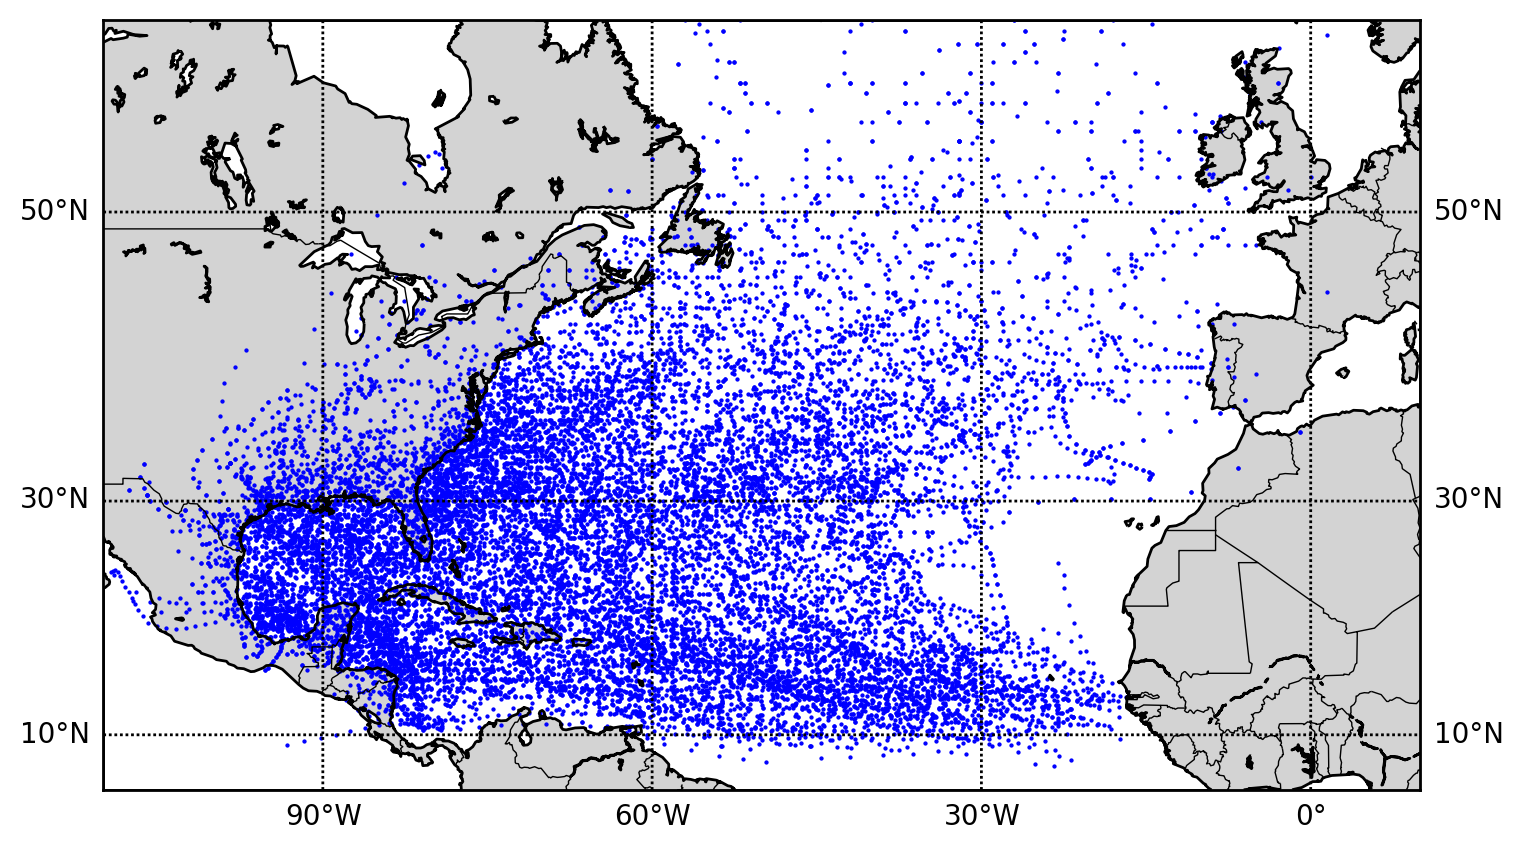

In [30]:
# Graph all points
plt.figure(figsize=(10,5))
m = Basemap(llcrnrlon=-110.,llcrnrlat=5.,urcrnrlon=10.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='#D3D3D3')
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

lat = data['Lat'].values
long = data['Long'].values
xpt, ypt = m(long, lat)
m.scatter(xpt, ypt, .3, color='blue')

plt.show()

In [31]:
data['gridID'] = np.zeros(total_data_count)

In [32]:
data.describe()

,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,distance,direction,gridID
count,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.0
mean,8.670249,15.643681,9.119096,26.882685,-63.332574,49.127629,994.587315,85.634510,171.156973,0.0
std,1.475817,8.863918,6.724253,10.089981,20.804515,25.152288,17.910808,74.863455,112.490070,0.0
min,1.000000,1.000000,0.000000,7.200000,-109.300000,10.000000,882.000000,0.000000,0.000000,0.0
25%,8.000000,8.000000,6.000000,18.500000,-80.400000,30.000000,988.000000,44.006926,70.458621,0.0
50%,9.000000,16.000000,12.000000,26.600000,-64.900000,40.000000,1001.000000,71.920245,176.776402,0.0
75%,10.000000,23.000000,18.000000,33.300000,-47.400000,60.000000,1007.000000,108.321455,264.468643,0.0
max,12.000000,31.000000,23.000000,69.000000,13.500000,165.000000,1024.000000,1766.824886,359.938162,0.0


In [33]:
# These variable are hyperparameters
lat_min = 7.2
long_min = -109.3
lat_interval = round(69 - 7.2)
long_interval = round(13.5 + 109.3)

data['gridID'] = np.floor(data['Lat'] - 7.200)* long_interval  + np.floor(data['Long'] + 109.3)
data['gridID'] = round(data['gridID'])

In [34]:
data.describe()

,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,distance,direction,gridID
count,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000,21680.000000
mean,8.670249,15.643681,9.119096,26.882685,-63.332574,49.127629,994.587315,85.634510,171.156973,2408.084041
std,1.475817,8.863918,6.724253,10.089981,20.804515,25.152288,17.910808,74.863455,112.490070,1245.264987
min,1.000000,1.000000,0.000000,7.200000,-109.300000,10.000000,882.000000,0.000000,0.000000,55.000000
25%,8.000000,8.000000,6.000000,18.500000,-80.400000,30.000000,988.000000,44.006926,70.458621,1384.000000
50%,9.000000,16.000000,12.000000,26.600000,-64.900000,40.000000,1001.000000,71.920245,176.776402,2366.000000
75%,10.000000,23.000000,18.000000,33.300000,-47.400000,60.000000,1007.000000,108.321455,264.468643,3225.000000
max,12.000000,31.000000,23.000000,69.000000,13.500000,165.000000,1024.000000,1766.824886,359.938162,7597.000000


In [35]:
data.to_csv('checkpoint-dataframe1.csv') # Save the dataframe to csv for checkpoint

## Build the Model

In [36]:
data = pd.read_csv('checkpoint-dataframe1.csv', index_col=0)

In [37]:
data.head() # Check loaded data

,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,unique-key,distance,direction,gridID
0,5,16,18,28.0,-78.7,30.0,1008,ARTHUR-2020-AL012020,0.000000,0.000000,2490.0
1,5,17,0,28.9,-78.0,35.0,1006,ARTHUR-2020-AL012020,75.333355,289.382873,2614.0
2,5,17,6,29.6,-77.6,35.0,1004,ARTHUR-2020-AL012020,54.043107,346.439371,2737.0
3,5,17,12,30.3,-77.5,35.0,1003,ARTHUR-2020-AL012020,48.734494,3.018270,2860.0
4,5,17,18,31.0,-77.3,40.0,1003,ARTHUR-2020-AL012020,49.804986,10.514512,2861.0


In [38]:
# Sort data by unique-key and time
data.sort_values(by=['unique-key', 'Month', 'Day', 'Hour'], inplace=True)

# Check the processed data
data.head(25)

,Month,Day,Hour,Lat,Long,WindSpeed,Pressure,unique-key,distance,direction,gridID
31570,6,2,0,18.8,-85.8,30.0,1005,ABBY-1968-1,0.000000,0.000000,1376.0
31573,6,2,18,21.4,-84.8,40.0,1002,ABBY-1968-1,190.999054,230.915394,1746.0
31574,6,3,0,22.3,-84.2,45.0,997,ABBY-1968-1,73.125660,248.497817,1870.0
31575,6,3,6,23.3,-83.9,60.0,999,ABBY-1968-1,71.686942,348.773839,1993.0
31576,6,3,12,24.5,-83.6,65.0,999,ABBY-1968-1,85.050130,14.434896,2116.0
31578,6,4,0,25.1,-83.3,65.0,994,ABBY-1968-1,45.526444,17.180714,2117.0
31579,6,4,6,25.8,-82.9,60.0,993,ABBY-1968-1,54.424009,18.917150,2240.0
31580,6,4,12,26.9,-82.1,55.0,992,ABBY-1968-1,90.717511,350.544696,2364.0
31583,6,5,6,28.1,-80.9,50.0,994,ABBY-1968-1,110.827466,292.193468,2488.0
31585,6,5,18,27.8,-80.2,50.0,965,ABBY-1968-1,47.486532,321.421596,2489.0


In [39]:
names = data['unique-key'].unique()
data.drop(['Month', 'Day', 'Hour', 'Lat', 'Long'], axis = 1, inplace = True)
data.head()

,WindSpeed,Pressure,unique-key,distance,direction,gridID
31570,30.0,1005,ABBY-1968-1,0.000000,0.000000,1376.0
31573,40.0,1002,ABBY-1968-1,190.999054,230.915394,1746.0
31574,45.0,997,ABBY-1968-1,73.125660,248.497817,1870.0
31575,60.0,999,ABBY-1968-1,71.686942,348.773839,1993.0
31576,65.0,999,ABBY-1968-1,85.050130,14.434896,2116.0


In [40]:
np.array(data)

array([[30.0, 1005, 'ABBY-1968-1', 0.0, 0.0, 1376.0],
       [40.0, 1002, 'ABBY-1968-1', 190.9990539633356, 230.9153939078364,
        1746.0],
       [45.0, 997, 'ABBY-1968-1', 73.12566001508581, 248.49781660917037,
        1870.0],
       ...,
       [45.0, 990, 'ZETA-2020-AL282020', 282.23949008494674,
        34.64699625178363, 3469.0],
       [45.0, 992, 'ZETA-2020-AL282020', 345.8509595003996,
        278.5448551268353, 3721.0],
       [45.0, 993, 'ZETA-2020-AL282020', 369.7818048215871,
        182.97405089640048, 3973.0]], dtype=object)

In [41]:
np.unique(data['unique-key'])

array(['ABBY-1968-1', 'AGNES-1972-2', 'ALBERTO-1982-1', 'ALBERTO-1988-1',
       'ALBERTO-1994-1', 'ALBERTO-2006-1', 'ALBERTO-2006-AL012006',
       'ALBERTO-2012-1', 'ALBERTO-2012-AL012012', 'ALBERTO-2018-AL012018',
       'ALEX-1998-1', 'ALEX-2004-1', 'ALEX-2004-AL012004', 'ALEX-2010-1',
       'ALEX-2010-AL012010', 'ALEX-2016-AL012016', 'ALICE-1973-4',
       'ALICIA-1983-3', 'ALLEN-1980-4', 'ALLISON-1989-2',
       'ALLISON-1995-1', 'ALLISON-2001-1', 'ALLISON-2001-AL012001',
       'ALMA-1962-1', 'ALMA-1966-1', 'ALMA-1970-1', 'ALPHA-1972-1',
       'ALPHA-2005-26', 'ALPHA-2005-AL262005', 'ALPHA-2020-AL242020',
       'AMY-1975-2', 'ANA-1979-2', 'ANA-1985-1', 'ANA-1991-1',
       'ANA-1997-2', 'ANA-2003-1', 'ANA-2003-AL012003', 'ANA-2009-2',
       'ANA-2009-AL022009', 'ANA-2015-AL012015', 'ANDREA-2007-1',
       'ANDREA-2007-AL012007', 'ANDREA-2013-AL012013',
       'ANDREA-2019-AL012019', 'ANDREW-1986-1', 'ANDREW-1992-4',
       'ANITA-1977-5', 'ANNA-1961-1', 'ANNA-1969-6', 'ANNA-

In [42]:
data_pad = []
for key in np.unique(data['unique-key']):
    data_pad += [data[ data.loc[:, 'unique-key'] == key].loc[:, ['WindSpeed', 'Pressure', 'distance', 'direction', 'gridID']]]

In [43]:
data_pad[0:3]

[       WindSpeed  Pressure    distance   direction  gridID
 31570       30.0      1005    0.000000    0.000000  1376.0
 31573       40.0      1002  190.999054  230.915394  1746.0
 31574       45.0       997   73.125660  248.497817  1870.0
 31575       60.0       999   71.686942  348.773839  1993.0
 31576       65.0       999   85.050130   14.434896  2116.0
 31578       65.0       994   45.526444   17.180714  2117.0
 31579       60.0       993   54.424009   18.917150  2240.0
 31580       55.0       992   90.717511  350.544696  2364.0
 31583       50.0       994  110.827466  292.193468  2488.0
 31585       50.0       965   47.486532  321.421596  2489.0
 31586       50.0       997   18.441810  348.103154  2489.0
 31590       50.0       999  201.090838  223.305339  2856.0,
        WindSpeed  Pressure    distance   direction  gridID
 25727       30.0      1001    0.000000    0.000000  1498.0
 25729       40.0       998   51.941213  147.232643  1499.0
 25737       65.0       986  265.356052

In [44]:
import keras
padded_data = keras.preprocessing.sequence.pad_sequences(data_pad, maxlen=60, dtype='int32', padding='post', truncating='pre', value=0.0)

In [45]:
max(data['gridID']) # Total grid spots

7597.0

In [46]:
# Normalize the values to predict them more easily in our model
scalers = {}
gridScalers = {}
for name in names:
    scalers[name] = MinMaxScaler(feature_range=(0, 1))
    
    hurricane = data[data['unique-key'] == name]
    hurricane.drop('unique-key', axis = 1, inplace= True)

    hurricane = pd.DataFrame(scalers[name].fit_transform(hurricane), columns=['WindSpeed',
                                                                              'Pressure',
                                                                              'distance',
                                                                              'direction',
                                                                              'gridID'])
    data.loc[data['unique-key'] == name, ['WindSpeed', 'Pressure', 'distance', 'direction', 'gridID']] = hurricane.values

/var/folders/jj/4zq46pn93jlcwz1788_dtcqm0000gn/T/ipykernel_44111/2677434487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurricane.drop('unique-key', axis = 1, inplace= True)
/var/folders/jj/4zq46pn93jlcwz1788_dtcqm0000gn/T/ipykernel_44111/2677434487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurricane.drop('unique-key', axis = 1, inplace= True)
/var/folders/jj/4zq46pn93jlcwz1788_dtcqm0000gn/T/ipykernel_44111/2677434487.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [47]:
data.head()

,WindSpeed,Pressure,unique-key,distance,direction,gridID
31570,0.000000,1.000,ABBY-1968-1,0.000000,0.000000,0.000000
31573,0.285714,0.925,ABBY-1968-1,0.949815,0.658733,0.250000
31574,0.428571,0.800,ABBY-1968-1,0.363645,0.708891,0.333784
31575,0.857143,0.850,ABBY-1968-1,0.356490,0.994948,0.416892
31576,1.000000,0.850,ABBY-1968-1,0.422944,0.041178,0.500000


In [48]:
data_pad = []
for key in np.unique(data['unique-key']):
    data_pad += [data[ data.loc[:, 'unique-key'] == key].loc[:, ['WindSpeed', 'Pressure', 'distance', 'direction', 'gridID']]]

In [49]:
data_pad[0:2]

[       WindSpeed  Pressure  distance  direction    gridID
 31570   0.000000     1.000  0.000000   0.000000  0.000000
 31573   0.285714     0.925  0.949815   0.658733  0.250000
 31574   0.428571     0.800  0.363645   0.708891  0.333784
 31575   0.857143     0.850  0.356490   0.994948  0.416892
 31576   1.000000     0.850  0.422944   0.041178  0.500000
 31578   1.000000     0.725  0.226397   0.049011  0.500676
 31579   0.857143     0.700  0.270644   0.053965  0.583784
 31580   0.714286     0.675  0.451127   1.000000  0.667568
 31583   0.571429     0.725  0.551131   0.833541  0.751351
 31585   0.571429     0.000  0.236145   0.916920  0.752027
 31586   0.571429     0.800  0.091709   0.993035  0.752027
 31590   0.571429     0.850  1.000000   0.637024  1.000000,
        WindSpeed  Pressure  distance  direction    gridID
 25727   0.000000  1.000000  0.000000   0.000000  0.000000
 25729   0.222222  0.875000  0.160248   0.410819  0.000385
 25737   0.777778  0.375000  0.818671   0.037548  0.189

In [50]:
padded_data = keras.preprocessing.sequence.pad_sequences(data_pad, maxlen=60, dtype='float', padding='post', truncating='pre', value=0.0)

In [51]:
print(len(padded_data[0]))
print(len(padded_data))

60
853


In [52]:
temp_flat = padded_data.reshape(60*len(padded_data),5)
print(temp_flat[0:200])
print(temp_flat.shape)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.85714286e-01 9.25000000e-01 9.49814800e-01 6.58733098e-01
  2.50000000e-01]
 [4.28571429e-01 8.00000000e-01 3.63644912e-01 7.08890533e-01
  3.33783784e-01]
 [8.57142857e-01 8.50000000e-01 3.56490346e-01 9.94948268e-01
  4.16891892e-01]
 [1.00000000e+00 8.50000000e-01 4.22943834e-01 4.11784754e-02
  5.00000000e-01]
 [1.00000000e+00 7.25000000e-01 2.26397407e-01 4.90114784e-02
  5.00675676e-01]
 [8.57142857e-01 7.00000000e-01 2.70643902e-01 5.39650168e-02
  5.83783784e-01]
 [7.14285714e-01 6.75000000e-01 4.51127025e-01 1.00000000e+00
  6.67567568e-01]
 [5.71428571e-01 7.25000000e-01 5.51131357e-01 8.33541260e-01
  7.51351351e-01]
 [5.71428571e-01 0.00000000e+00 2.36144682e-01 9.16920436e-01
  7.52027027e-01]
 [5.71428571e-01 8.00000000e-01 9.17088519e-02 9.93035004e-01
  7.52027027e-01]
 [5.71428571e-01 8.50000000e-01 1.00000000e+00 6.37023870e-01
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.000000

In [53]:
def load_data(stock, seq_len, amount_of_features):

    sequence_length = seq_len + 1 # Because index starts at 0
    result = []

    for index in range(len(stock) - sequence_length):
        seq = stock[index: index + sequence_length]
        result.append(seq)

    result = np.array(result)
    row = len(result) * 0.85 # Amount of data to train on
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return [x_train, y_train, x_test, y_test]

### Train the Model

In [54]:
seq_len = 12 # Another hyperparameter- length of hurricane?
feature_count = 5
X_train, y_train, X_test, y_test = load_data(temp_flat[::-1], seq_len, feature_count)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (43491, 12, 5)
y_train (43491,)
X_test (7676, 12, 5)
y_test (7676,)


In [55]:
def build_model(layers):
    model = Sequential()

    # Correct the input_shape to (seq_len, feature_count)
    model.add(LSTM(units=layers[1], return_sequences=True, input_shape=(seq_len, layers[0])))
    model.add(Dropout(0.1))

    for x in range(0,2): #Adjusted loop for subsequent LSTM layers
        model.add(LSTM(units=layers[1], return_sequences=True))
        model.add(Dropout(0.1))

    model.add(LSTM(units=layers[2], return_sequences=False))
    model.add(Dropout(0.1))

    model.add(Dense(units=layers[2]))
    model.add(Activation("tanh"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [88]:
model = build_model([feature_count, seq_len, 1])

2025-04-10 12:40:04.207939: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-10 12:40:04.208955: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-10 12:40:04.210037: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-10 12:40:04.210178: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-10 12:40:04.210608: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Compilation Time :  0.011088132858276367


In [89]:
model.fit(X_train, y_train, batch_size=512, epochs=200, validation_split=0.1, verbose=1)

Epoch 1/200


2025-04-10 12:40:26.871065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:27.416166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:28.049413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:28.111693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:28.182287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:29.781576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:31.106505: I tensorflow/core/grappler/optimizers/cust

77/77 [==============================] - ETA: 0s - loss: 0.0854 - accuracy: 0.5875

2025-04-10 12:40:35.806400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:35.941075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:35.988738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:36.042655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-10 12:40:36.092704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 11s 51ms/step - loss: 0.0854 - accuracy: 0.5875 - val_loss: 0.0641 - val_accuracy: 0.6432
Epoch 2/200
77/77 [==============================] - 2s 21ms/step - loss: 0.0637 - accuracy: 0.5858 - val_loss: 0.0513 - val_accuracy: 0.6414
Epoch 3/200
77/77 [==============================] - 2s 22ms/step - loss: 0.0505 - accuracy: 0.5878 - val_loss: 0.0387 - val_accuracy: 0.6414
Epoch 4/200
77/77 [==============================] - 2s 22ms/step - loss: 0.0407 - accuracy: 0.5907 - val_loss: 0.0302 - val_accuracy: 0.6439
Epoch 5/200
77/77 [==============================] - 2s 22ms/step - loss: 0.0361 - accuracy: 0.5915 - val_loss: 0.0257 - val_accuracy: 0.6441
Epoch 6/200
77/77 [==============================] - 2s 21ms/step - loss: 0.0319 - accuracy: 0.5927 - val_loss: 0.0233 - val_accuracy: 0.6476
Epoch 7/200
77/77 [==============================] - 2s 24ms/step - loss: 0.0301 - accuracy: 0.5937 - val_loss: 0.0227 - val_accuracy: 0.6476
Epoch 8/200
77/77

In [92]:
#SAVING MODEL

# Serialize model to JSON
model_json = model.to_json()
with open("model_sheils.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5/content/checkpoint-dataframe1.csv
# Changed filename to include .weights.h5
model.save_weights("model_sheils.weights.h5")
print("Saved Model to Disk")

Saved Model to Disk


## Predicting Hurricane Trajectory

In [56]:
# Load json and create model
json_file = open('model_sheils.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("model_sheils.weights.h5")
print("Loaded Model from Disk")
model = loaded_model

2025-04-11 09:42:35.180475: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-11 09:42:35.180526: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-11 09:42:35.180544: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-11 09:42:35.181305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-11 09:42:35.181829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Loaded Model from Disk


In [57]:
pred = model.predict(X_test)

2025-04-11 09:42:38.505883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-11 09:42:38.648629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/240 [..............................] - ETA: 3:17

2025-04-11 09:42:38.715836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-11 09:42:38.765996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-11 09:42:38.816160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


240/240 [==============================] - 2s 5ms/step


In [58]:
len(pred)

7676

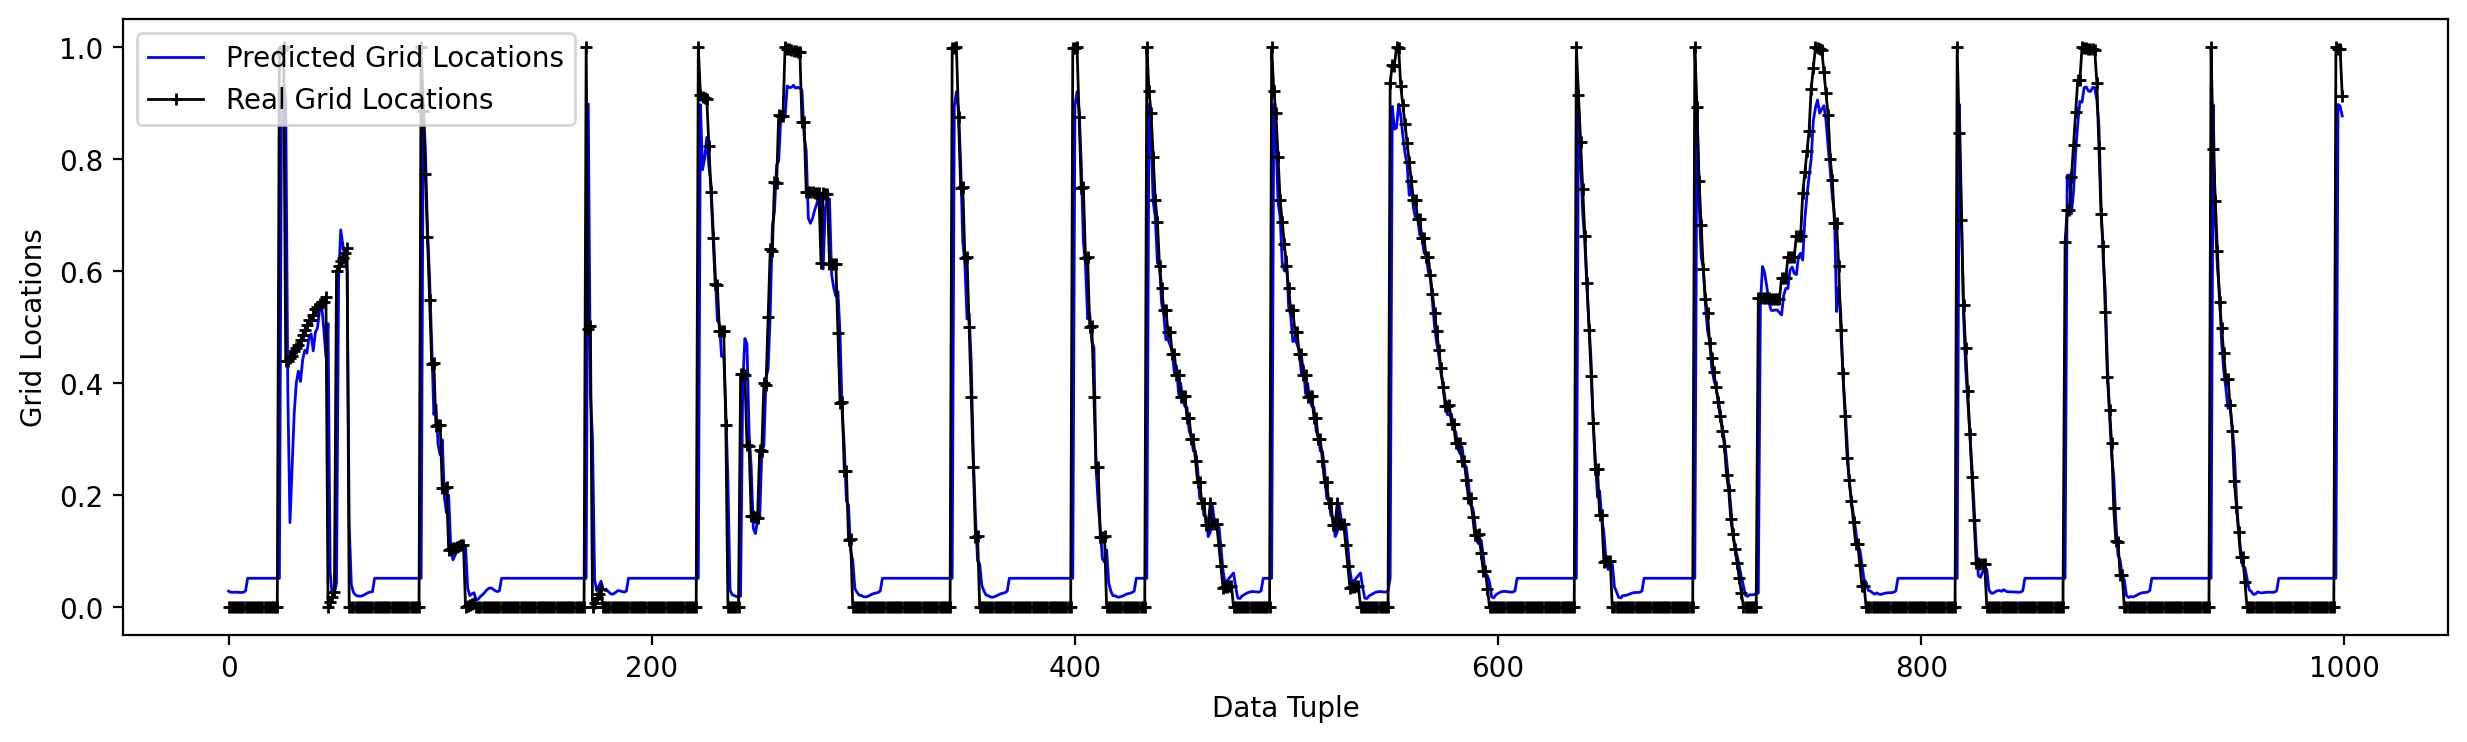

In [59]:
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred[:1000],
         linewidth=1,
         color='blue',
         label='Predicted Grid Locations')
plt.plot(y_test[:1000],
         linewidth=1,
         color='black',
         marker='+',
         markersize=4,
         label='Real Grid Locations')
# plt.savefig('denormalized_predictions')
plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')

plt.legend(loc='upper left')
# plt.savefig('grid_accuracy.png')
plt.show()

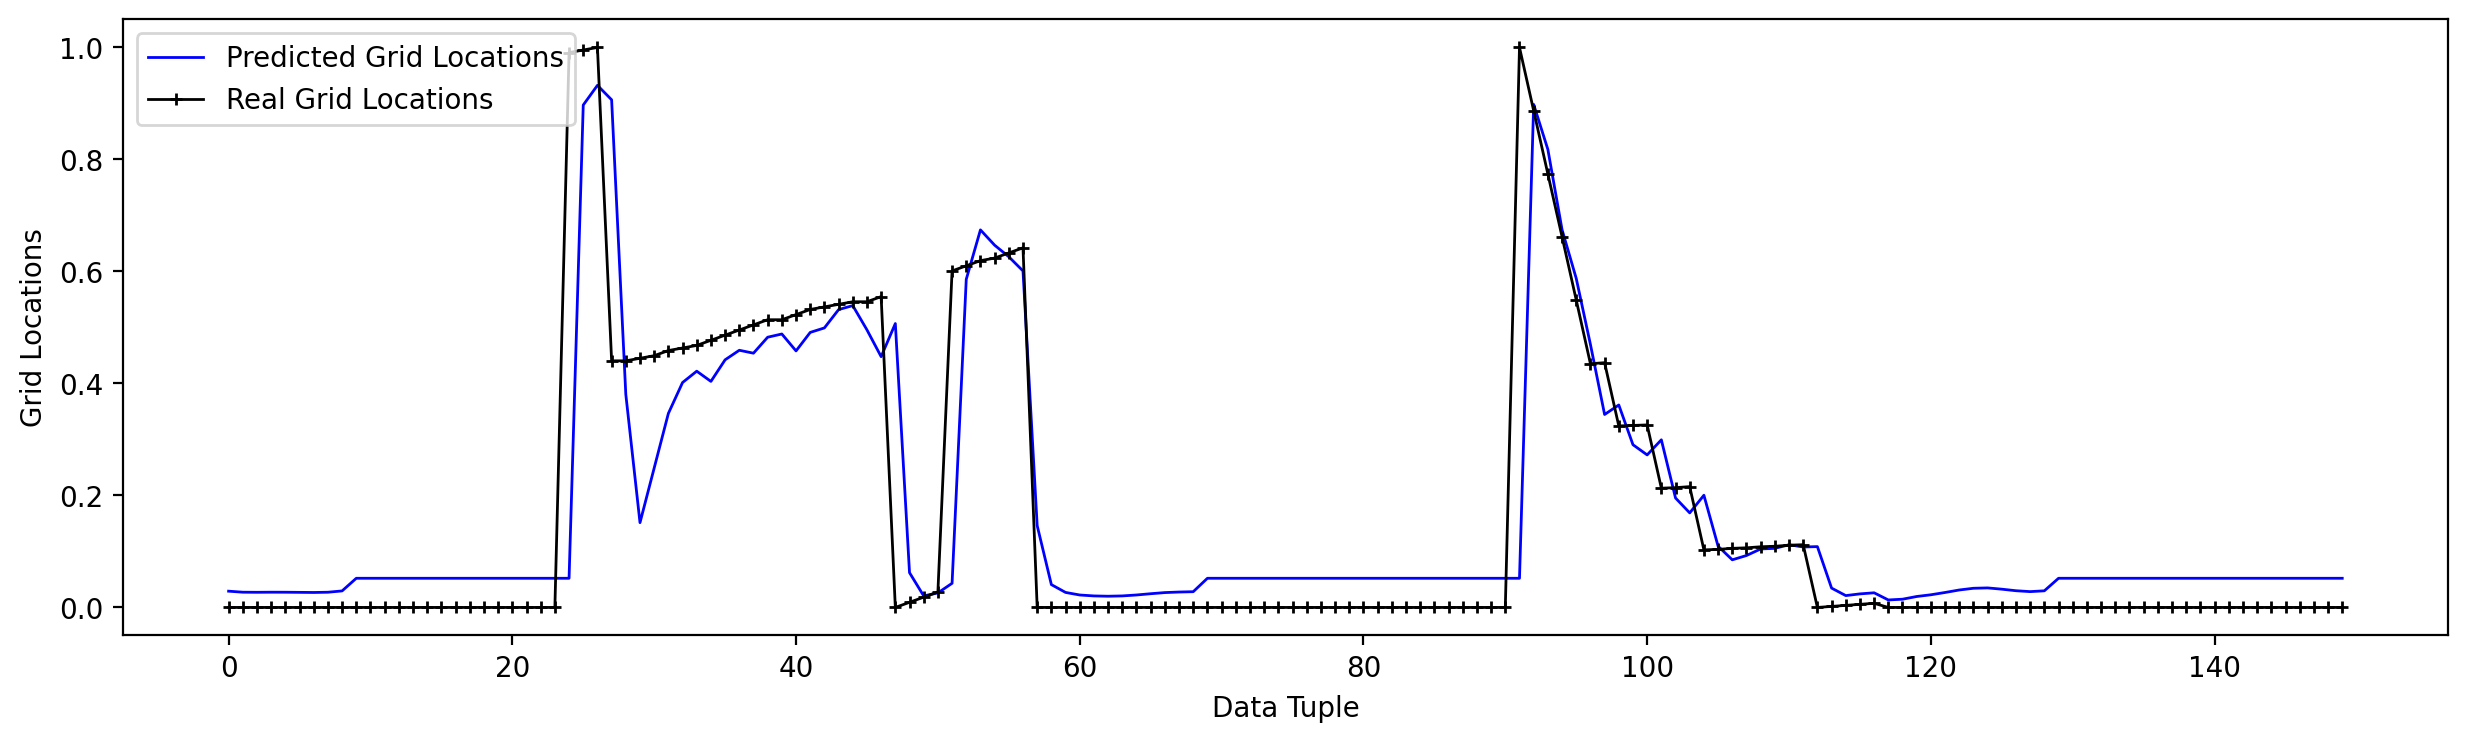

In [97]:
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred[:150],
         linewidth=1,
         color='blue',
         label='Predicted Grid Locations')
plt.plot(y_test[:150],
         linewidth=1,
         color='black',
         marker='+',
         markersize=4,
         label='Real Grid Locations')
# plt.savefig('denormalized_predictions')
plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')

plt.legend(loc='upper left')
# plt.savefig('grid_accuracy.png')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# Assuming `y_test` contains the actual values and `pred` contains the predicted values
rmse_value = calculate_rmse(y_test, pred)

print(f"Root Mean Square Error (RMSE): {rmse_value}")


Root Mean Square Error (RMSE): 0.1298935859477958


In [61]:
pred[0:60].flatten()

array([0.02904854, 0.02722111, 0.02704792, 0.02722342, 0.02717029,
       0.02690797, 0.02672168, 0.02716775, 0.02950539, 0.05208595,
       0.05208595, 0.05208595, 0.05208595, 0.05208595, 0.05208595,
       0.05208595, 0.05208595, 0.05208595, 0.05208595, 0.05208595,
       0.05208595, 0.05208595, 0.05208595, 0.05208595, 0.05208595,
       0.8971674 , 0.93232304, 0.90650946, 0.38039476, 0.15141149,
       0.2485506 , 0.3464312 , 0.40162918, 0.42190242, 0.40362853,
       0.44219184, 0.45925874, 0.45403355, 0.4825381 , 0.4883152 ,
       0.45809975, 0.49114504, 0.49916112, 0.53183275, 0.5390091 ,
       0.4956526 , 0.44782448, 0.50696194, 0.06211165, 0.02058348,
       0.02592944, 0.0431312 , 0.58597314, 0.6742332 , 0.64688987,
       0.6262003 , 0.60087717, 0.14612296, 0.04077837, 0.02681325],
      dtype=float32)

In [62]:
flat_pred = pred.flatten()

In [63]:
y_test[0:80]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99082569,
       0.99541284, 1.        , 0.44036697, 0.44036697, 0.44495413,
       0.44954128, 0.4587156 , 0.46330275, 0.46788991, 0.47706422,
       0.48623853, 0.49541284, 0.50458716, 0.51376147, 0.51376147,
       0.52293578, 0.53211009, 0.53669725, 0.5412844 , 0.54587156,
       0.54587156, 0.55504587, 0.        , 0.00917431, 0.01834862,
       0.02752294, 0.60091743, 0.61009174, 0.61926606, 0.62385321,
       0.63302752, 0.64220183, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [64]:
hurr_real = []
hurr_pred = []
temp_real = []
temp_pred = []
for x in range(len(y_test)):
    if not y_test[x] == 0:
        temp_real += [y_test[x]]
        temp_pred += [flat_pred[x]]
    else:
        hurr_real += [temp_real]
        hurr_pred += [temp_pred]

        temp_real = []
        temp_pred = []

In [65]:
print(len(hurr_real))
print(len(hurr_pred))

lol_real = [x for x in hurr_real if bool(x)]
print(len(lol_real))
lol_pred = [x for x in hurr_pred if bool(x)]
print(len(lol_pred))

4746
4746
182
182


In [66]:
model.summary()
model.get_config()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 12)            864       
                                                                 
 dropout (Dropout)           (None, 12, 12)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 12)            1200      
                                                                 
 dropout_1 (Dropout)         (None, 12, 12)            0         
                                                                 
 lstm_2 (LSTM)               (None, 12, 12)            1200      
                                                                 
 dropout_2 (Dropout)         (None, 12, 12)            0         
                                                                 
 lstm_3 (LSTM)               (None, 1)                 5

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12, 5),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'lstm_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'LSTM',
   'config': {'name': 'lstm',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 12, 5),
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 12,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'recurrent_initializer': {'module': 'keras.initializers',
     'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None},
     'regis

##[Hurricane IDALIA 2023]

In [67]:
data = pd.read_csv('/Users/kartikjain/Documents/viiSemester/DMS672/Hurricane Path Prediction Solution/Phase 2/Data/test_idalia_2023.csv', index_col=0)

In [68]:
names = data['unique-key'].unique()
data.drop(['Month', 'Day', 'Hour', 'Lat', 'Long'], axis = 1, inplace = True)

In [69]:
np.array(data)

array([[25, 1006, '             IDALIA-2023-AL102023', 0.0, 0.0, 1622.0],
       [25, 1006, '             IDALIA-2023-AL102023',
        35.143348588635945, 6.9662524992495465, 1745.0],
       [30, 1004, '             IDALIA-2023-AL102023', 18.89285689827645,
        11.37265598706674, 1621.0],
       [30, 1002, '             IDALIA-2023-AL102023', 48.84772713028992,
        3.843447476523806, 1621.0],
       [35, 999, '             IDALIA-2023-AL102023', 52.62856830240241,
        155.19160467298047, 1499.0],
       [40, 996, '             IDALIA-2023-AL102023', 32.48385011839352,
        164.28388656419088, 1499.0],
       [45, 992, '             IDALIA-2023-AL102023', 26.89783464333804,
        166.91595533410816, 1499.0],
       [55, 989, '             IDALIA-2023-AL102023', 14.719975999428678,
        174.27984760695134, 1500.0],
       [55, 989, '             IDALIA-2023-AL102023', 48.36539522124196,
        180.0, 1623.0],
       [60, 986, '             IDALIA-2023-AL102023', 41

In [70]:
np.unique(data['unique-key'])

array(['             IDALIA-2023-AL102023'], dtype=object)

In [71]:
data_pad = []
for key in np.unique(data['unique-key']):
    data_pad += [data[ data.loc[:, 'unique-key'] == key].loc[:, ['WindSpeed', 'Pressure', 'distance', 'direction', 'gridID']]]

In [72]:
len(data)
len(data_pad)
len_vals = []
for x in range(len(data_pad)):
    len_vals += [len(data_pad[x])]

In [73]:
import keras
padded_data = keras.preprocessing.sequence.pad_sequences(data_pad, maxlen=60, dtype='int32', padding='post', truncating='pre', value=0.0)

In [74]:
# Normalize the values to predict them more easily in our model
scalers = {}
gridScalers = {}
for name in names:
    scalers[name] = MinMaxScaler(feature_range=(0, 1))
#     gridScalers[name] = MinMaxScaler(feature_range=(0, 1))
#     gridScalers[name].fit_transform((data[data['unique-key'] == name])['gridID'].reshape(-1,1))
    hurricane = data[data['unique-key'] == name]
    hurricane.drop('unique-key', axis = 1, inplace= True)

    hurricane = pd.DataFrame(scalers[name].fit_transform(hurricane), columns=['WindSpeed',
                                                                              'Pressure',
                                                                              'distance',
                                                                              'direction',
                                                                              'gridID'])
    data.loc[data['unique-key'] == name, ['WindSpeed', 'Pressure', 'distance', 'direction', 'gridID']] = hurricane.values

In [75]:
data_pad = []
for key in np.unique(data['unique-key']):
    data_pad += [data[ data.loc[:, 'unique-key'] == key].loc[:, ['WindSpeed', 'Pressure', 'distance', 'direction', 'gridID']]]

In [76]:
padded_data = keras.preprocessing.sequence.pad_sequences(data_pad, maxlen=60, dtype='float', padding='post', truncating='pre', value=0.0)

In [77]:
temp_flat = padded_data.reshape(60*len(padded_data),5)

In [78]:
def load_data(stock, seq_len, amount_of_features):
    # Convert stock data to array if needed
    sequence_length = seq_len + 1 # Because index starts at 0
    result = []

    for index in range(len(stock) - sequence_length):
        seq = stock[index: index + sequence_length]
        result.append(seq)

    result = np.array(result)
    row = len(result) * 0 # Amount of data to train on

    # Only keep the test set
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:, -1]

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return [x_test, y_test]

seq_len = 12 # Another hyperparameter
feature_count = 5
X_test, y_test = load_data(temp_flat[::-1], seq_len, feature_count)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (47, 12, 5)
y_test (47,)


In [79]:
pred = model.predict(X_test)

2/2 [==============================] - 0s 101ms/step


In [80]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# Assuming `y_test` contains the actual values and `pred` contains the predicted values
rmse_value = calculate_rmse(y_test, pred)

print(f"Root Mean Square Error (RMSE): {rmse_value}")

Root Mean Square Error (RMSE): 0.033709441737943005


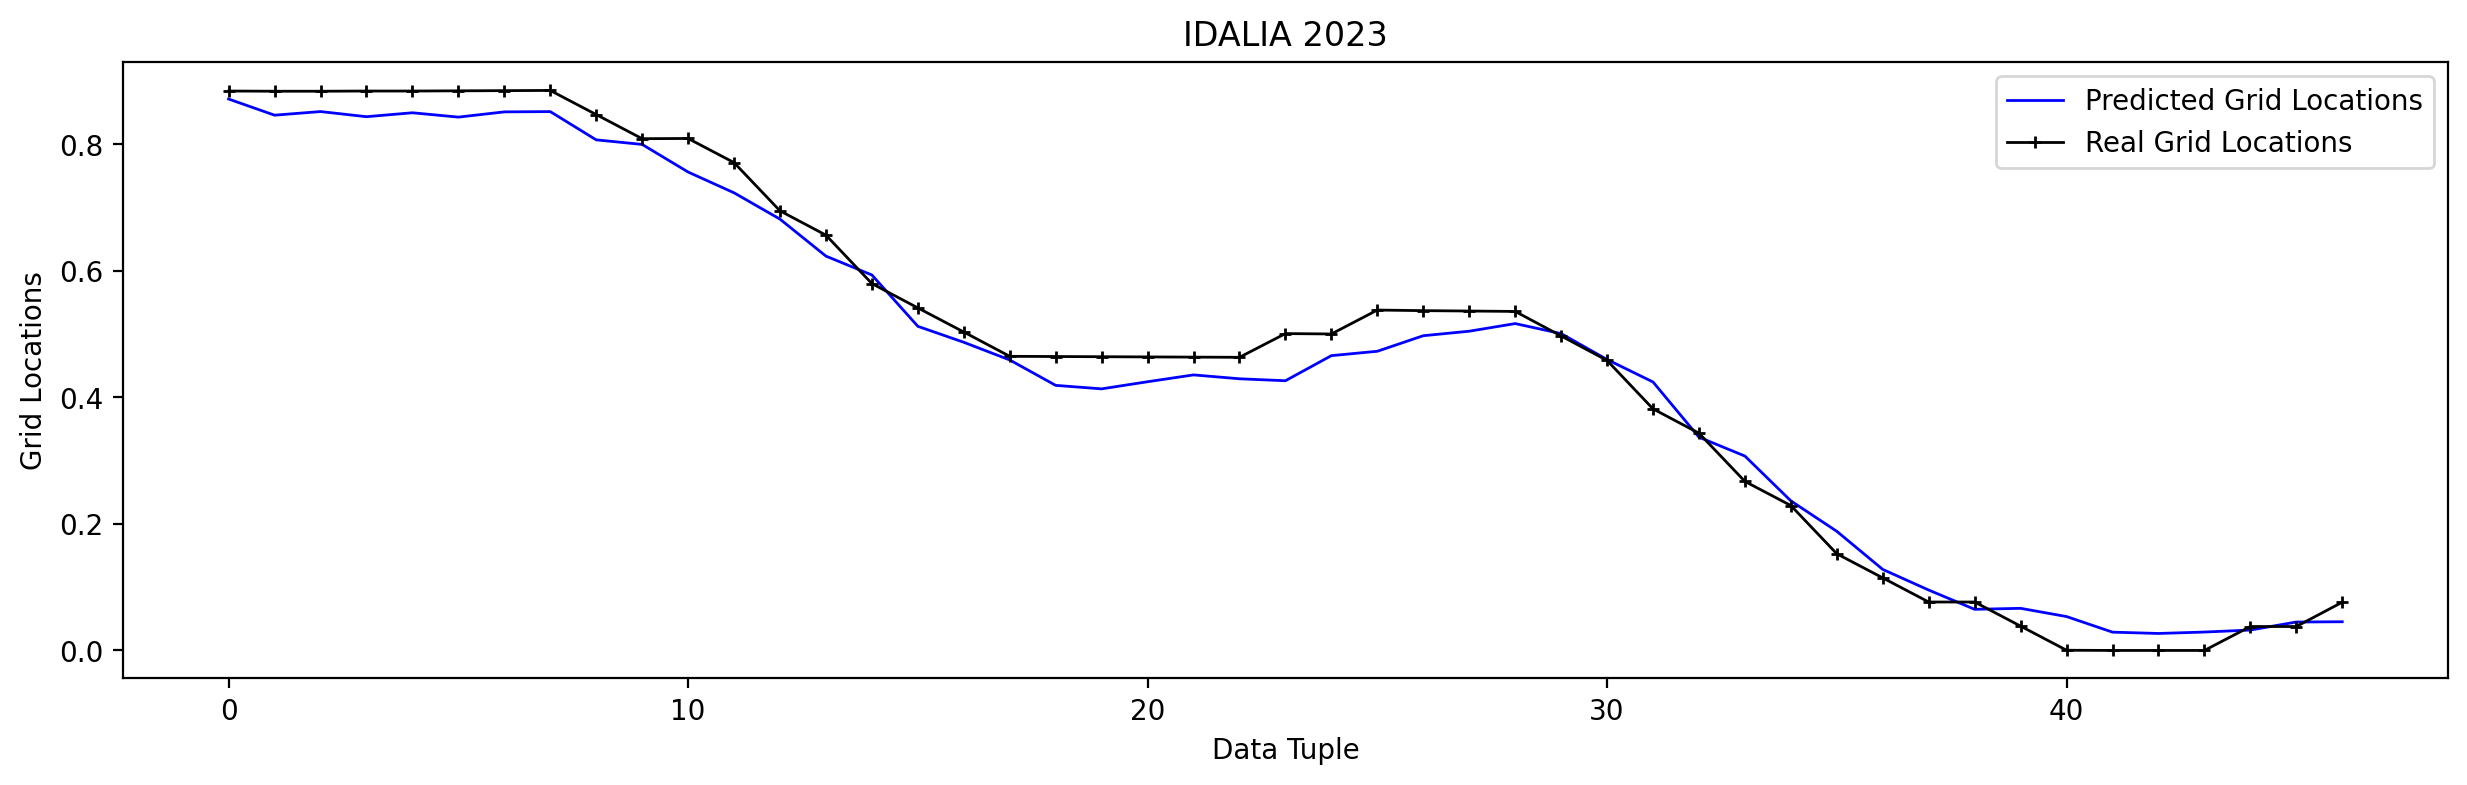

In [81]:
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred[:1000],
         linewidth=1,
         color='blue',
         label='Predicted Grid Locations')
plt.plot(y_test[:1000],
         linewidth=1,
         color='black',
         marker='+',
         markersize=4,
         label='Real Grid Locations')
# plt.savefig('denormalized_predictions')
plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')
plt.title('IDALIA 2023')
plt.legend(loc='upper right')
# plt.savefig('grid_accuracy.png')
plt.show()